<b>Using data create a model (Linear Regression) to predict a
house&#39;s value. We want to be able to understand what creates value
in a house, as though we were a real estate developer. The project
should follow the guideline as:</b>
1. Examine and explore data (visualization, interactions among
features)
2. Apply the model for prediction with holdout and cross
validation
3. Using PCA, apply the model with holdout and cross
validation
4. Visualize the residue and homoscedasticity
5. Tune the model if necessary
6. Write up analysis for each section (for example, explain why
the model is overfitting, explain why applying PCA is better,
etc.)
7. Include conclusions for summary

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import rc
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Examine and explore data (visualization, interactions among features)

In [2]:
data=pd.read_csv("Melbourne_housing_FULL.csv")

In [3]:
data.shape

(34857, 21)

# There are 34857 rows and 21 columns. This sample is large enough for testing.

In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
pd.set_option('display.max_columns', 500,'display.max_rows', 500)

In [6]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [7]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [8]:
(data.isnull().sum()/len(data))*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

# Delete columns that missing more than 30%.

In [9]:
del data['BuildingArea']
del data['YearBuilt']
del data['Landsize']
del data['Date']
data=data.dropna()

In [10]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [11]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [12]:
data.describe(include="all")

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,20401,20401,20401.000000,20401,2.040100e+04,20401,20401,20401.000000,20401.000000,20401.000000,20401.000000,20401.000000,20401,20401.000000,20401.000000,20401,20401.000000
unique,338,20035,NaN,3,NaN,5,320,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,5 Charles St,NaN,h,NaN,S,Nelson,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,NaN
freq,491,4,NaN,15352,NaN,13345,2119,NaN,NaN,NaN,NaN,NaN,1880,NaN,NaN,6217,NaN
mean,NaN,NaN,3.065291,NaN,1.088339e+06,NaN,NaN,11.444645,3114.626244,3.049850,1.596392,1.715259,NaN,-37.806842,144.997212,NaN,7508.850007
std,NaN,NaN,0.945657,NaN,6.552566e+05,NaN,NaN,6.866696,115.447538,0.956359,0.702750,0.994518,NaN,0.092208,0.120885,NaN,4411.864798
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,0.000000,3000.000000,0.000000,0.000000,0.000000,NaN,-38.190430,144.423790,NaN,83.000000
25%,NaN,NaN,2.000000,NaN,6.550000e+05,NaN,NaN,6.600000,3046.000000,2.000000,1.000000,1.000000,NaN,-37.861300,144.924900,NaN,4380.000000
50%,NaN,NaN,3.000000,NaN,9.050000e+05,NaN,NaN,10.500000,3087.000000,3.000000,1.000000,2.000000,NaN,-37.799800,145.004500,NaN,6567.000000
75%,NaN,NaN,4.000000,NaN,1.330000e+06,NaN,NaN,14.200000,3152.000000,4.000000,2.000000,2.000000,NaN,-37.748000,145.069500,NaN,10331.000000


In [13]:
data.select_dtypes(['object']).columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [14]:
obj=['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname','Postcode']

for i in obj:
    print( str(i) + ':'+ str(len(data[i].value_counts())))

Suburb:338
Address:20035
Type:3
Method:5
SellerG:320
CouncilArea:33
Regionname:8
Postcode:208


# I delete Address column because it's over 500.

In [15]:
del data['Address']

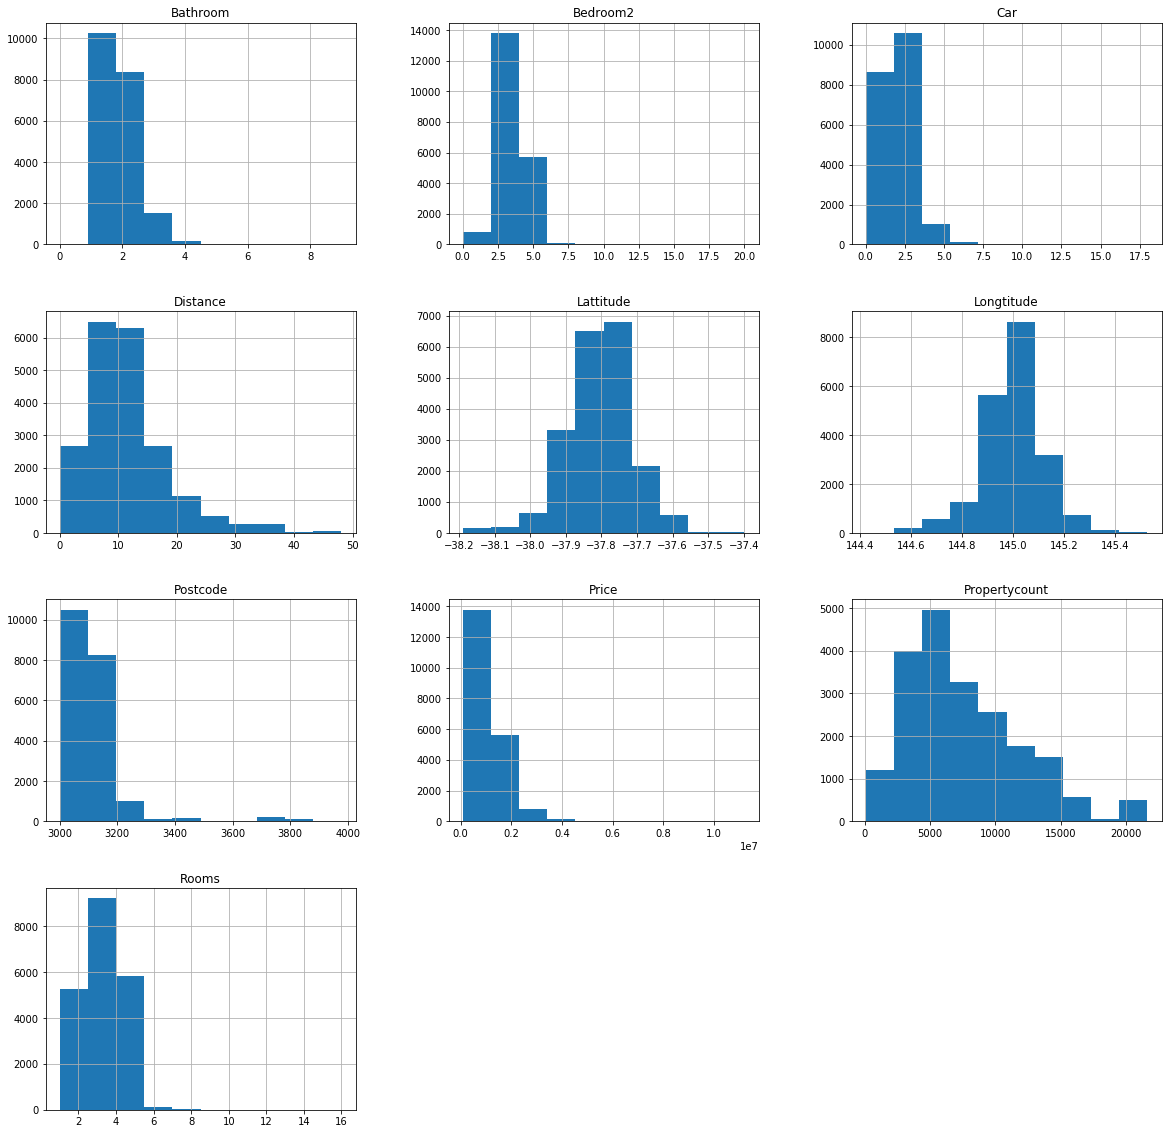

In [16]:
data.hist(figsize=(20,20))
plt.show()

In [17]:
data.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [18]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount
count,20401.000000,2.040100e+04,20401.000000,20401.000000,20401.000000,20401.000000,20401.000000,20401.000000,20401.000000,20401.000000
mean,3.065291,1.088339e+06,11.444645,3114.626244,3.049850,1.596392,1.715259,-37.806842,144.997212,7508.850007
std,0.945657,6.552566e+05,6.866696,115.447538,0.956359,0.702750,0.994518,0.092208,0.120885,4411.864798
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.550000e+05,6.600000,3046.000000,2.000000,1.000000,1.000000,-37.861300,144.924900,4380.000000
50%,3.000000,9.050000e+05,10.500000,3087.000000,3.000000,1.000000,2.000000,-37.799800,145.004500,6567.000000
75%,4.000000,1.330000e+06,14.200000,3152.000000,4.000000,2.000000,2.000000,-37.748000,145.069500,10331.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,20.000000,9.000000,18.000000,-37.397800,145.526350,21650.000000


# One hot encoding and minmaxscaler

In [19]:
data.select_dtypes(['object']).columns

Index(['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname'], dtype='object')

In [20]:
obj=['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname','Postcode']

for i in obj:
    data = pd.get_dummies(data, columns=[i])

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
print(scaler.fit(data))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [24]:
print(scaler.data_max_)

[ 1.6000000e+01  1.1200000e+07  4.8100000e+01  2.0000000e+01
  9.0000000e+00  1.8000000e+01 -3.7397800e+01  1.4552635e+02
  2.1650000e+04  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.00000

In [25]:
data1=scaler.transform(data)

In [26]:
data.columns

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Lattitude', 'Longtitude', 'Propertycount', 'Suburb_Abbotsford',
       ...
       'Postcode_3806.0', 'Postcode_3807.0', 'Postcode_3808.0',
       'Postcode_3809.0', 'Postcode_3810.0', 'Postcode_3910.0',
       'Postcode_3975.0', 'Postcode_3976.0', 'Postcode_3977.0',
       'Postcode_3978.0'],
      dtype='object', length=924)

In [27]:
data2=pd.DataFrame(data1, columns=data.columns)

In [28]:
data2.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Botanic Ridge,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulla,Suburb_Bulleen,Suburb_Bullengarook,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Clyde North,Suburb_Coburg,Suburb_Coburg North,Suburb_Coldstream,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cranbourne West,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Eumemmerring,Suburb_Eynesbury,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Ferny Creek,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gisborne South,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heatherton,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kalkallo,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Laverton,Suburb_Lilydale,Suburb_Lower Plenty,Suburb_Lynbrook,Suburb_Lysterfield,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Mickleham,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Monbulk,Suburb_Mont Albert,Suburb_

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
data_train, data_test = train_test_split(data2, train_size=0.8, test_size=0.2)

In [31]:
data_train.shape

(16320, 924)

In [32]:
data_test.shape

(4081, 924)

# 2. Apply the model for prediction with holdout and cross validation

In [33]:
import statsmodels.api as sm

In [34]:
data_train_target=data_train['Price']

In [35]:
data_test_target=data_test['Price']

In [36]:
del data_test['Price']

In [37]:
del data_train['Price']

In [38]:
X = data_train
y = data_train_target

In [39]:
model = sm.OLS(y, X).fit()

In [40]:
predictions = model.predict(data_test)

In [48]:
pd.options.display.float_format = '{:.5f}'.format

In [49]:
data_test_target

19953   0.14170
14572   0.03842
19854   0.05263
11090   0.05331
12997   0.21098
7600    0.02942
19678   0.06928
19915   0.04926
9609    0.09537
2703    0.06208
9922    0.11156
5909    0.04836
19657   0.04004
10693   0.16401
5765    0.09681
11089   0.10409
16275   0.09942
12777   0.11111
7463    0.13945
12047   0.06793
3409    0.14710
16241   0.04714
4507    0.13936
7919    0.06613
17659   0.05173
18337   0.07692
5801    0.02789
11241   0.19928
7475    0.19478
16593   0.08025
3735    0.03752
19569   0.05191
496     0.09969
10329   0.22177
6066    0.05042
12154   0.05281
11826   0.03734
9783    0.03972
11617   0.07099
1699    0.04363
4215    0.07152
10715   0.12101
14480   0.04633
5526    0.10661
4405    0.04480
3589    0.04903
13072   0.08502
15764   0.08331
4872    0.18848
2441    0.05857
14397   0.09042
16120   0.06433
15734   0.07895
3894    0.10904
7611    0.11696
15913   0.17679
11319   0.07332
17907   0.06613
12415   0.15879
18920   0.06523
8227    0.03707
14495   0.20243
5133    

In [50]:
predictions

19953           0.14980
14572           0.01969
19854           0.04384
11090           0.03185
12997           0.14135
7600            0.05990
19678           0.08397
19915           0.04859
9609            0.08585
2703            0.06964
9922            0.14411
5909            0.10113
19657           0.02763
10693           0.09405
5765            0.11849
11089           0.11085
16275           0.11348
12777           0.13267
7463            0.12577
12047           0.06263
3409            0.14314
16241           0.04933
4507            0.09363
7919            0.05508
17659           0.03488
18337           0.05835
5801            0.02890
11241           0.14200
7475            0.16255
16593           0.06953
3735            0.03598
19569           0.06825
496             0.10983
10329           0.15640
6066            0.06364
12154           0.01188
11826           0.02558
9783            0.03497
11617           0.09354
1699            0.07522
4215            0.06606
10715           

In [42]:
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     55.89
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:52:30   Log-Likelihood:                 32852.
No. Observations:               16320   AIC:                        -6.441e+04
Df Residuals:                   15674   BIC:                        -5.944e+04
Df Model:                         645                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Rooms                                          0.2112      0.015     14.352      0.000       0.182       0.240
Distance                                      -0.2227      0.022    -10.114      0.000      -0.266      -0.180
Bedroom2                                       0.0456      0.019      2.396      0.017       0.008       0.083
Bathroom                                       0.1157      0.005     25.048      0.000       0.107       0.125
Car                                            0.0841      0.005     15.406      0.000       0.073       0.095
Lattitude                                     -0.1446      0.032     -4.474      0.000      -0.208      -0.081
Longtitude                                    -0.1717      0.033     -5.251      0.000      -0.236      -0.108
Propertycount                              -5.296e+09   3.95e+09     -1.341      0.180    -1.3e+10    2.45e+09
Suburb_Abbotsford                           3.019e+09   2.25e+09      1.341      0.180    -1.4e+09    7.43e+09
Suburb_Aberfeldie                           6.806e+08   5.08e+08      1.341      0.180   -3.15e+08    1.68e+09
Suburb_Airport West                        -5.574e+08   4.16e+08     -1.341      0.180   -1.37e+09    2.58e+08
Suburb_Albanvale                           -1.339e+09   9.99e+08     -1.341      0.180    -3.3e+09    6.19e+08
Suburb_Albert Park                          2.135e+09   1.59e+09      1.341      0.180   -9.87e+08    5.26e+09
Suburb_Albion                               3.256e+07   2.43e+07      1.341      0.180    -1.5e+07    8.02e+07
Suburb_Alphington                          -1.128e+09   8.42e+08     -1.341      0.180   -2.78e+09    5.21e+08
Suburb_Altona                               2.749e+09   2.05e+09      1.341      0.180   -1.27e+09    6.77e+09
Suburb_Altona Meadows                       1.308e+09   9.76e+08      1.341      0.180   -6.05e+08    3.22e+09
Suburb_Altona North                         1.311e+08   9.78e+07      1.341      0.180   -6.06e+07    3.23e+08
Suburb_Ardeer                                2.16e+09   1.61e+09      1.341      0.180   -9.98e+08    5.32e+09
Suburb_Armadale                            -1.751e+08   1.31e+08     -1.341      0.180   -4.31e+08    8.09e+07
Suburb_Ascot Vale                          -5.976e+08   4.46e+08     -1.341      0.180   -1.47e+09    2.76e+08
Suburb_Ashburton                           -2.513e+09   1.87e+09     -1.341      0.180   -6.19e+09    1.16e+09
Suburb_Ashwood                              -1.16e+09   8.66e+08     -1.341      0.180   -2.86e+09    5.36e+08
Suburb_Aspendale                           -7.079e+08   5.28e+08     -1.341      0.180   -1.74e+09    3.27e+08
Suburb_Aspendale Gardens                   -8.506e+08   6.35e+08     -1.341      0.180